<a href="https://colab.research.google.com/github/MDRobiulhassan/Spam-Email-Detection/blob/main/SpamEmailDetectionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spam Email Detection/spam_and_ham_classification.csv')

In [5]:
df.head()

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   9989 non-null   object
 1   text    9989 non-null   object
dtypes: object(2)
memory usage: 156.2+ KB


In [7]:
df

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...
...,...,...
9984,ham,this would be a great tragedy for all concerne...
9985,ham,"hello , welcome to medzonline filamentous shop..."
9986,ham,this is amazing stuff add some inches fast saf...
9987,spam,author jra date escapenumber escapenumber esca...


# Data Preprocessing


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['label'] = encoder.fit_transform(df['label'])

In [11]:
#null
df.isnull().sum()

,0
label,0
text,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(9989, 2)

In [14]:
df['label'].value_counts()

,count
label,
0,5294
1,4695


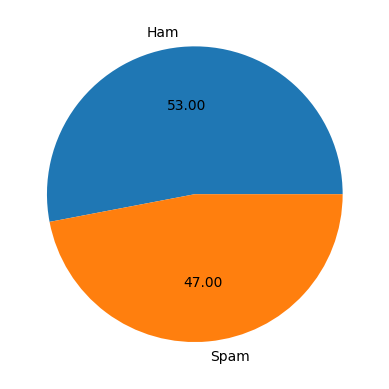

In [15]:
plt.pie(df['label'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

In [16]:
df['length']=df['text'].apply(len)

In [17]:
df.head()

,label,text,length
0,0,into the kingdom of god and those that are ent...,1054
1,1,there was flow at hpl meter 1505 on april firs...,235
2,0,take a look at this one campaign for bvyhprice...,218
3,1,somu wrote actually thats what i was looking f...,847
4,1,fathi boudra wrote i fixed the issue in the sv...,549


In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,label,text,length,word_count
0,0,into the kingdom of god and those that are ent...,1054,183
1,1,there was flow at hpl meter 1505 on april firs...,235,56
2,0,take a look at this one campaign for bvyhprice...,218,30
3,1,somu wrote actually thats what i was looking f...,847,166
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84


In [21]:
df['sentence_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head(100)

,label,text,length,word_count,sentence_count
0,0,into the kingdom of god and those that are ent...,1054,183,1
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9
2,0,take a look at this one campaign for bvyhprice...,218,30,1
3,1,somu wrote actually thats what i was looking f...,847,166,1
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1
...,...,...,...,...,...
95,0,"sun , 19 dec 2004 22 : 45 : 30 - 0600\nbefore ...",2342,457,28
96,0,lady stalking grimly away on the arm of a rosy...,3160,556,1
97,1,andrew i'm very happy with the progress i've m...,380,77,1
98,1,"hi norma ,\nsevil ' s primary project has been...",448,83,5


In [23]:
df[['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,9989.000000,9989.000000,9989.000000
mean,1622.113525,277.279708,7.021123
std,3329.436295,582.884890,26.366359
min,4.000000,1.000000,1.000000
25%,443.000000,79.000000,1.000000
50%,859.000000,150.000000,1.000000
75%,1864.000000,312.000000,5.000000
max,141261.000000,24945.000000,988.000000


In [24]:
df[df['label']==0][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,5294.000000,5294.000000,5294.000000
mean,1280.679071,215.684360,6.518700
std,2687.793425,471.502756,20.757494
min,4.000000,1.000000,1.000000
25%,352.000000,60.000000,1.000000
50%,678.000000,117.000000,1.000000
75%,1479.500000,246.000000,4.000000
max,141261.000000,24945.000000,502.000000


In [25]:
df[df['label']==1][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,4695.000000,4695.000000,4695.000000
mean,2007.109052,346.733546,7.587646
std,3893.761448,680.551094,31.508210
min,4.000000,1.000000,1.000000
25%,576.000000,108.000000,1.000000
50%,1114.000000,197.000000,1.000000
75%,2159.000000,379.000000,6.000000
max,85490.000000,16876.000000,988.000000


In [26]:
import seaborn as sns

<Axes: >

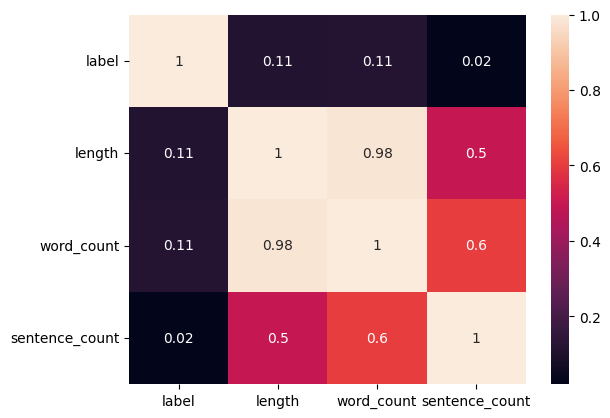

In [27]:
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True)

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [29]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [31]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)

In [33]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [35]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

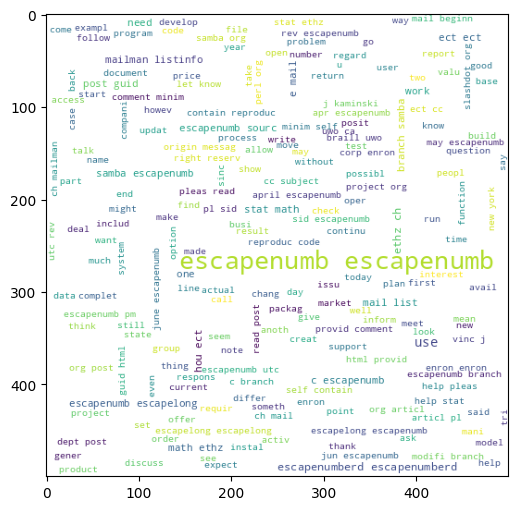

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [37]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

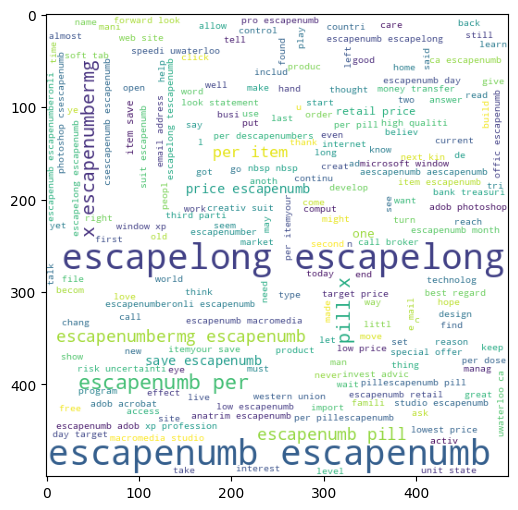

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [40]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)


1010080

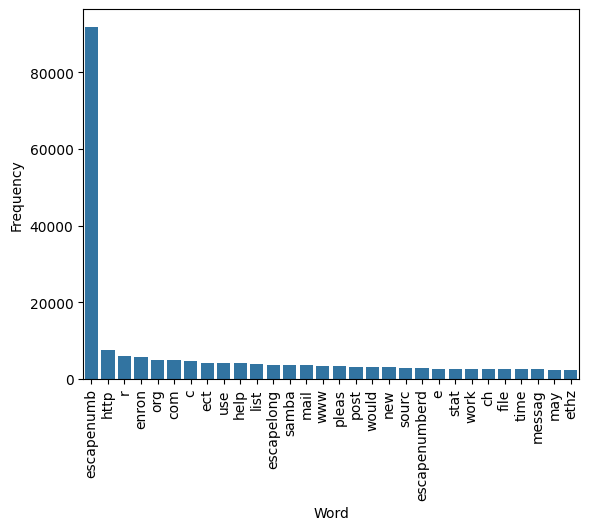

In [42]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [43]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

677739

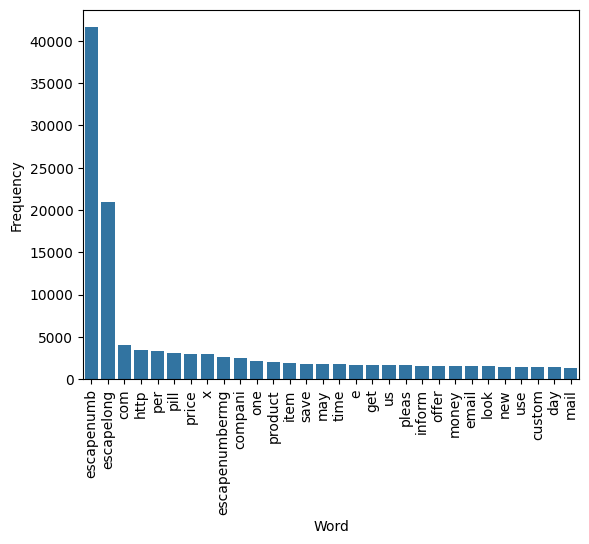

In [45]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [46]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [47]:
df['processed_length'] = df['transformed_text'].apply(len)

In [48]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...,440


# Intial Model Development

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [50]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [51]:
X.shape

(9989, 3000)

In [52]:
y = df['label'].values

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, fbeta_score

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.94994994994995
[[997  52]
 [ 48 901]]
0.9454354669464848


In [58]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9514514514514515
[[1003   46]
 [  51  898]]
0.951271186440678


In [59]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8858858858858859
[[979  70]
 [158 791]]
0.9186991869918699


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [62]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    #'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [63]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)

    return accuracy, precision, recall, f2

In [64]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9359359359359359, 0.9362380446333688, 0.928345626975764, 0.9299134473295334)

In [65]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f2_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f2 = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print(f"For {name}:")
    print(f"Accuracy  - {current_accuracy}")
    print(f"Precision - {current_precision}")
    print(f"Recall    - {current_recall}")
    print(f"F2 Score  - {current_f2}")
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f2_scores.append(current_f2)

For SVC:
Accuracy  - 0.9359359359359359
Precision - 0.9362380446333688
Recall    - 0.928345626975764
F2 Score  - 0.9299134473295334

For KN:
Accuracy  - 0.7607607607607607
Precision - 0.9555125725338491
Recall    - 0.5205479452054794
F2 Score  - 0.5726872246696035

For NB:
Accuracy  - 0.9514514514514515
Precision - 0.951271186440678
Recall    - 0.946259220231823
F2 Score  - 0.9472573839662447

For DT:
Accuracy  - 0.8483483483483484
Precision - 0.9511173184357542
Recall    - 0.7175974710221286
F2 Score  - 0.754654255319149

For LR:
Accuracy  - 0.954954954954955
Precision - 0.9704271631982475
Recall    - 0.9336143308746049
F2 Score  - 0.9407517519643236

For RF:
Accuracy  - 0.9644644644644644
Precision - 0.9640591966173362
Recall    - 0.9610115911485775
F2 Score  - 0.9616195698017714

For AdaBoost:
Accuracy  - 0.8713713713713713
Precision - 0.9379746835443038
Recall    - 0.7808219178082192
F2 Score  - 0.8078935891844745

For ETC:
Accuracy  - 0.9674674674674675
Precision - 0.9633123689727

In [72]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F2 Score': f2_scores
}).sort_values('F2 Score', ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F2 Score
7,ETC,0.967467,0.963312,0.968388,0.967368
5,RF,0.964464,0.964059,0.961012,0.961620
2,NB,0.951451,0.951271,0.946259,0.947257
4,LR,0.954955,0.970427,0.933614,0.940752
9,xgb,0.950951,0.966046,0.929399,0.936505
0,SVC,0.935936,0.936238,0.928346,0.929913
8,GBDT,0.905906,0.964591,0.832455,0.855905
6,AdaBoost,0.871371,0.937975,0.780822,0.807894
3,DT,0.848348,0.951117,0.717597,0.754654
1,KN,0.760761,0.955513,0.520548,0.572687


In [74]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [75]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.967467
1,RF,Accuracy,0.964464
2,NB,Accuracy,0.951451
3,LR,Accuracy,0.954955
4,xgb,Accuracy,0.950951
5,SVC,Accuracy,0.935936
6,GBDT,Accuracy,0.905906
7,AdaBoost,Accuracy,0.871371
8,DT,Accuracy,0.848348
9,KN,Accuracy,0.760761


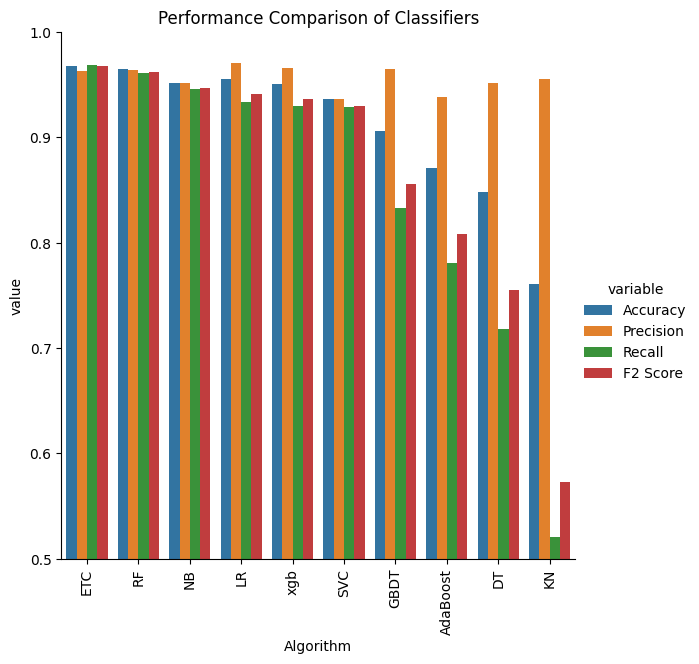

In [76]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=6)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Performance Comparison of Classifiers")
plt.show()

In [77]:
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)
    print("\n")

Confusion Matrix for SVC:
 [[989  60]
 [ 68 881]]


Confusion Matrix for KN:
 [[1026   23]
 [ 455  494]]


Confusion Matrix for NB:
 [[1003   46]
 [  51  898]]


Confusion Matrix for DT:
 [[1014   35]
 [ 268  681]]


Confusion Matrix for LR:
 [[1022   27]
 [  63  886]]


Confusion Matrix for RF:
 [[1015   34]
 [  37  912]]


Confusion Matrix for AdaBoost:
 [[1000   49]
 [ 208  741]]


Confusion Matrix for ETC:
 [[1014   35]
 [  30  919]]


Confusion Matrix for GBDT:
 [[1020   29]
 [ 159  790]]


Confusion Matrix for xgb:
 [[1018   31]
 [  67  882]]




#Model Optimization

In [78]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [80]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [81]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [83]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Recall,F2 Score,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.967467,0.963312,0.968388,0.967368,0.967467,0.963312,0.967467,0.963312,0.967467,0.963312
1,RF,0.964464,0.964059,0.961012,0.961620,0.964464,0.964059,0.964464,0.964059,0.964464,0.964059
2,NB,0.951451,0.951271,0.946259,0.947257,0.951451,0.951271,0.951451,0.951271,0.951451,0.951271
3,LR,0.954955,0.970427,0.933614,0.940752,0.954955,0.970427,0.954955,0.970427,0.954955,0.970427
4,xgb,0.950951,0.966046,0.929399,0.936505,0.950951,0.966046,0.950951,0.966046,0.950951,0.966046
5,SVC,0.935936,0.936238,0.928346,0.929913,0.935936,0.936238,0.935936,0.936238,0.935936,0.936238
6,GBDT,0.905906,0.964591,0.832455,0.855905,0.905906,0.964591,0.905906,0.964591,0.905906,0.964591
7,AdaBoost,0.871371,0.937975,0.780822,0.807894,0.871371,0.937975,0.871371,0.937975,0.871371,0.937975
8,DT,0.848348,0.951117,0.717597,0.754654,0.848348,0.951117,0.848348,0.951117,0.848348,0.951117
9,KN,0.760761,0.955513,0.520548,0.572687,0.760761,0.955513,0.760761,0.955513,0.760761,0.955513


In [100]:
#lr = LogisticRegression(solver='liblinear', penalty='l1')
rf = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [104]:
voting = VotingClassifier(estimators=[('rf', rf), ('et', etc)], voting='soft')

In [105]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

y_pred = voting.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9674674674674675
Precision: 0.9662447257383966
Recall: 0.9652265542676501
F2 Score: 0.9654300168634065
Confusion Matrix:
 [[1017   32]
 [  33  916]]


In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1049
           1       0.97      0.97      0.97       949

    accuracy                           0.97      1998
   macro avg       0.97      0.97      0.97      1998
weighted avg       0.97      0.97      0.97      1998



In [108]:
# Applying stacking
estimators=[('rf', rf), ('et', etc)]
final_estimator=RandomForestClassifier()

In [109]:
from sklearn.ensemble import StackingClassifier

In [110]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9654654654654654
Precision: 0.9661016949152542
Recall: 0.9610115911485775
F2 Score: 0.9620253164556962
Confusion Matrix:
 [[1017   32]
 [  37  912]]


In [145]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1049
           1       0.97      0.96      0.96       949

    accuracy                           0.97      1998
   macro avg       0.97      0.97      0.97      1998
weighted avg       0.97      0.97      0.97      1998



In [147]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [148]:
import nltk
from collections import Counter
from nltk.corpus import stopwords, wordnet

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [149]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)


In [150]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [151]:
!pip install gradio

In [153]:
import gradio as gr
import pickle
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

def classify_email(text):
    transformed_text = transform_text(text)
    vector_input = tfidf.transform([transformed_text])
    vector_input_dense = vector_input.toarray()
    result = model.predict(vector_input_dense)[0]
    return "Spam" if result == 0 else "Not Spam"

iface = gr.Interface(fn=classify_email, inputs="text", outputs="text", title="Spam Detection System")

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2ba9e30190fe82d9d0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
